# Maximum likelihood estimator for contribution of different species

## Imports and loading data:

In [17]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import csv
import seaborn as sns
from ExplainableMaximumLikelihoodCalculator import ExplainableMaximumLikelihoodCalculator
import pysam
from Bio import SeqIO, Seq, SeqRecord, pairwise2
from Bio.pairwise2 import format_alignment
from BamFileUtils import getListOfReadsFromBamFile, getListOfReadsFromFastaFile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import shap
from scipy.stats import chisquare
from scipy.special import rel_entr
fileNameSapiens =  "data/simulatedData/human_chinese_AF346973_500samples.fas"
fileNameNeanderthals =  "data/simulatedData/Neanderthal_Goyet_KX198085_500samples.fas"
fileNameDenisovans =  "data/simulatedData/denisova_kx663333_500samples.fas"
neanderthals_500_generated = getListOfReadsFromFastaFile(fileNameNeanderthals)
sapiens_500_generated = getListOfReadsFromFastaFile(fileNameSapiens)
denisovan_500_samples = getListOfReadsFromFastaFile(fileNameDenisovans)
path_to_frequencies_table = "data/substitution_matrix.tsv"

In [18]:
number_of_sapienses = 50
number_of_neanderthals = 50
number_of_denisovans = 50

total_length = number_of_sapienses + number_of_neanderthals + number_of_denisovans
all_indexes = [i for i in range(total_length)]
neanderthal_indexes = [i for i in all_indexes if i<number_of_neanderthals]
sapienses_indexes = [i for i in all_indexes if i>= number_of_neanderthals and i < number_of_sapienses + number_of_neanderthals]
denisovans_indexes = [i for i in all_indexes if i>= number_of_sapienses + number_of_neanderthals]

simulated_reads = neanderthals_500_generated[:number_of_neanderthals] + sapiens_500_generated[300:300+number_of_sapienses] + denisovan_500_samples[:number_of_denisovans]

## Load references file names for all species

In [19]:
sapiens_reference_file_names = [
                    "data/reference_files/human_AF346981_French.fa",
                     "data/reference_files/human_AY195760_Korea.fa",
                      "data/reference_files/human_AY882416_Ethiopia.fa",
                      "data/reference_files/human_AY963586_Italian.fa",
                      "data/reference_files/human_AY195781_Caucasian.fa",
                      "data/reference_files/human_AY195757_Iraqi-Israeli.fa",
                      "data/reference_files/human_AY195749_NativeAmerican.fa"]
neanderthals_reference_file_names = [
                            "data/reference_files/neanderthal_mezmaiskaya1_FM865411.fa",
                           "data/reference_files/Neanderthal_Altai_KC879692.fa",
                           "data/reference_files/Neanderthal_Denisova11_full_mtDNA_KU131206.fa",
                           "data/reference_files/Neanderthal_Spy_94a_MG025538.fa",
                            "data/reference_files/Neanderthal_Vindija33.16_AM948965.fa",
                            "data/reference_files/Neanderthal_Vindija33.19_KJ533545.fa"]
denisovan_reference_file_names = [  
                        "data/reference_files/Denisova_MT576653.1.fa",
                        "data/reference_files/Denisova_MT576652.1.fa",
                        "data/reference_files/Denisova_4_FR695060.fa",
                        "data/reference_files/Denisova_8_KT780370.fa",
                        "data/reference_files/Denisova_manual_phalanx_NC_013993.fa",
                        "data/reference_files/Denisova_MT576651.1.fa"]

## Creating a maximum likelihood estimator - to estimate the contribution of each species to the data set:

In [20]:
likeli_calculator = ExplainableMaximumLikelihoodCalculator(simulated_reads,
                                                ref_neanderthal_file_names=neanderthals_reference_file_names,
                                                ref_sapien_file_names=sapiens_reference_file_names,
                                                ref_denisovan_file_names=denisovan_reference_file_names,
                                                path_to_substitution_matrix=path_to_frequencies_table,
                                                number_of_jobs=-1)

Loading sequences and calculating alignments to all references, this might take a while. Number of reads:  150
start working on read number 0
start working on read number 10
start working on read number 20
start working on read number 30
start working on read number 40
start working on read number 50
start working on read number 60
start working on read number 70
start working on read number 80
start working on read number 90
start working on read number 100
start working on read number 110
start working on read number 120
start working on read number 130
start working on read number 140
Excluding read index 71 due to too low alignment score: 0.8344497607655503


## Estimation to the contribution of each species to the data set:
### This compares the ground truth to the output of the system.

In [21]:
total_number_of_reads = likeli_calculator.number_of_reads
estimation = likeli_calculator.estimate_species_proportions(100)
actual_values = {'Homo Sapiens' : number_of_sapienses / total_number_of_reads, 'Neanderthals' : number_of_neanderthals / total_number_of_reads, 'Denisovans':number_of_denisovans / total_number_of_reads}
comparison = estimation.append(actual_values, ignore_index=True).rename(index={0: "Estimation", 1: "Actual"})

print(f"sample size: {total_length}")

comparison


sample size: 150


,Homo Sapiens,Neanderthals,Denisovans
Estimation,0.320000,0.350000,0.330000
Actual,0.333333,0.333333,0.333333


## Results basic explanation:

In [22]:
likeli_calculator.explain_the_results()

sapien    neanderthel      denisovan     Read number
These are reads that are probably Sapien:

((1.2209573485947873e-06, 8.140919254940325e-07, 1.2387945125425846e-10), 17)
((0.0026213867430714094, 0.0017488514033706431, 6.071593648459943e-07), 25)
((0.009581629530097507, 1.3819210966607596e-05, 1.3758636558283813e-10), 50)
((0.001052008908439411, 4.3551004012637843e-07, 1.287953730377672e-10), 52)
((0.008578203922660066, 1.9665994301557204e-06, 1.9665994301557204e-06), 53)
((0.2157284767616223, 0.17978436369595419, 3.9280786201090914e-05), 56)
((0.429821864493534, 8.69512688259212e-08, 0.00016907586083177235), 57)
((1.3896483062214625e-09, 1.165837545670889e-09, 2.5654809906815928e-20), 58)
((8.100838819588735e-06, 2.3956980587290076e-09, 2.3956980587290076e-09), 59)
((7.357381587630212e-07, 1.0611264816900242e-09, 4.904931571801775e-07), 64)
((0.008532914087287754, 2.52347765083104e-06, 1.0763299481376294e-12), 67)
((3.19996170715644e-07, 4.944250066134558e-12, 1.6294819443004175e-1

## Calculate shapley values for every read and visualize it:

In [26]:
shaps = likeli_calculator.calculate_shap_values(5000)

1


  0%|          | 0/1 [00:00<?, ?it/s]

1
5000


In [27]:
data = likeli_calculator.generateCounterFactualMinimalSetToRemoveAndChangeMax(shaps)

Change dominating species from Neanderthal to Denisovan would require removing 2 reads: [21, 27]


summary plot:


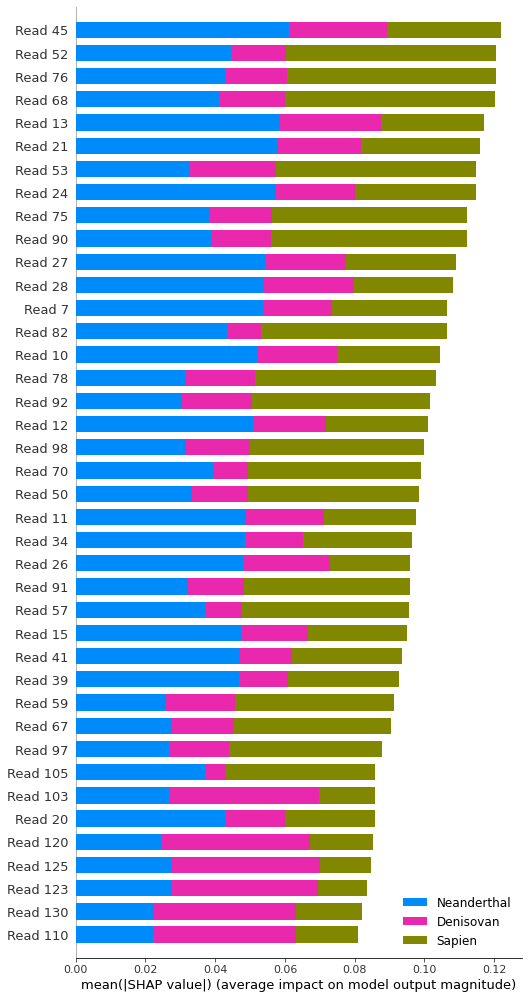

Force plots
Homo Sapiens:


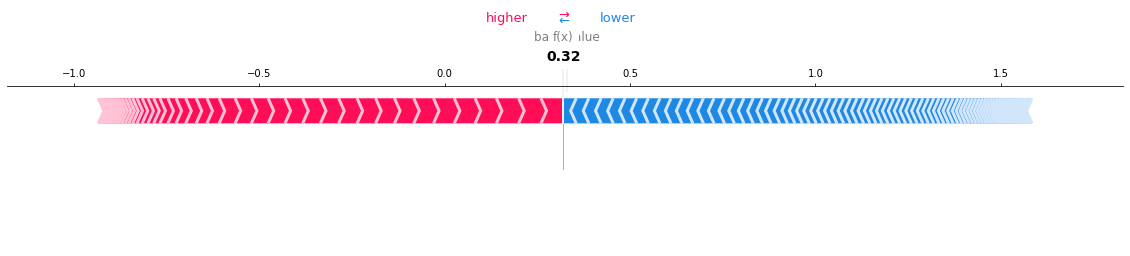

Neanderthals:


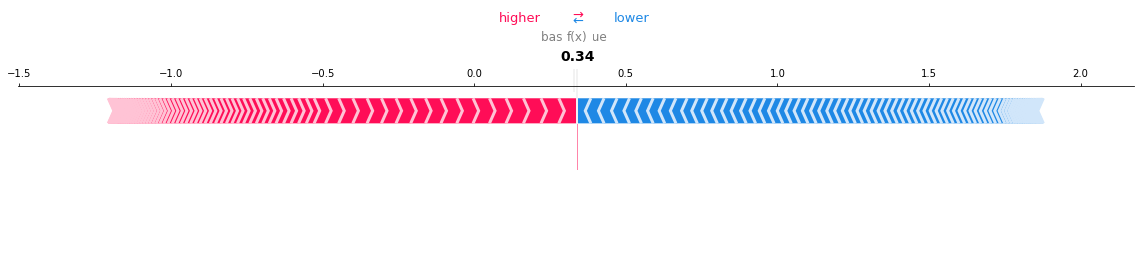

Denisovans:


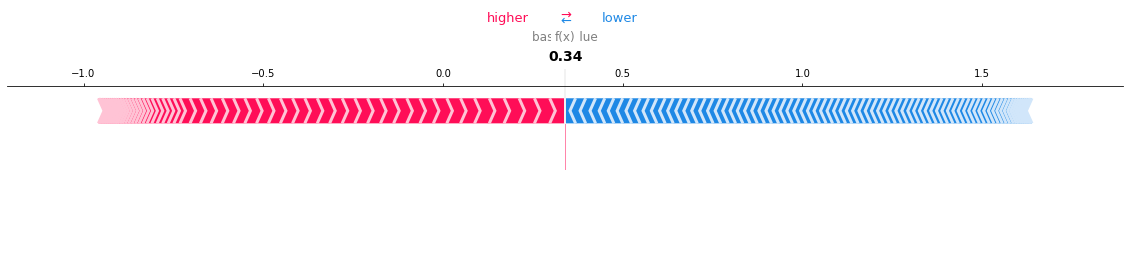

Decision plots:
Homo Sapiens


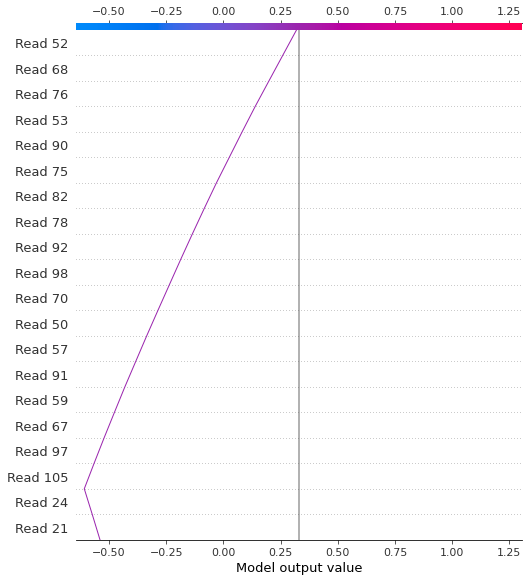

Neanderthals:


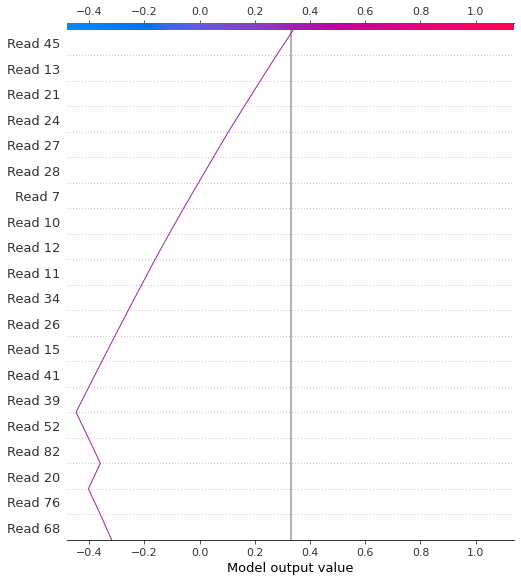

Denisovans:


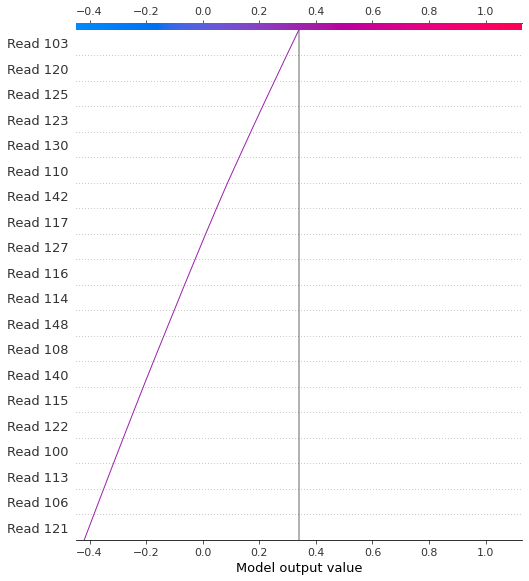

Multi output decision plot:


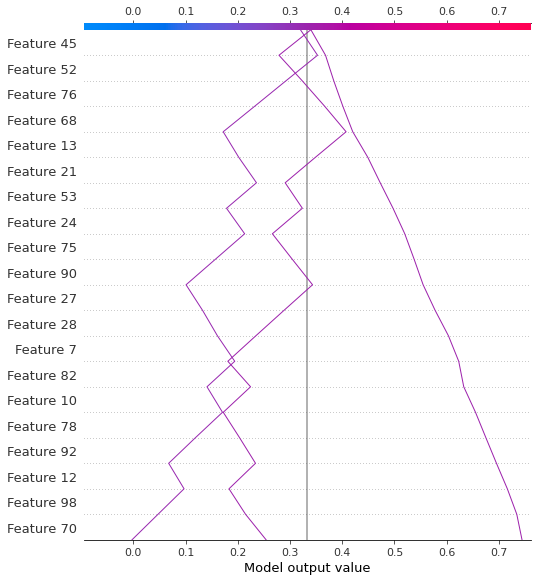

In [21]:
likeli_calculator.plot_shap_values(shaps)

### Summary plot

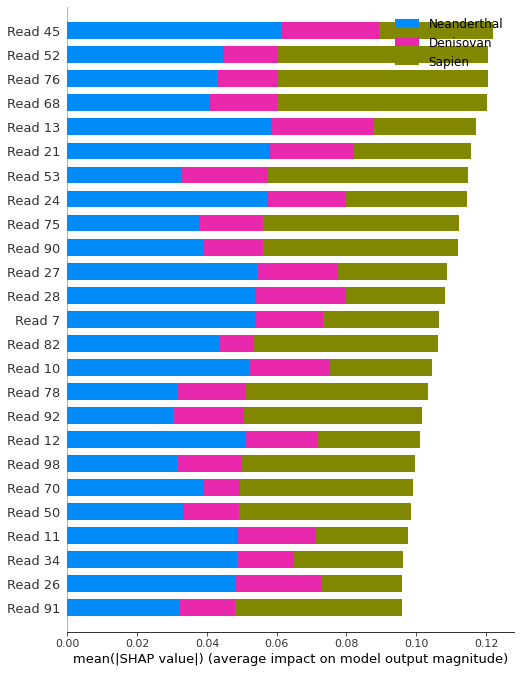

In [22]:
sample = np.ones((1,likeli_calculator.number_of_reads))
shap.initjs()
shap.summary_plot(shap_values=shaps,
                features=sample,
                plot_type="bar",
                class_names = ["Sapien", "Neanderthal", "Denisovan"],
                feature_names = ["Read " + str(i) for i in range(likeli_calculator.number_of_reads)],
                max_display=25,
                )

### Force plots:

In [23]:
shap.force_plot(likeli_calculator.explainer.expected_value[0], shaps[0], feature_names=["Read " + str(i) for i in range(likeli_calculator.number_of_reads)])


In [24]:
print("Neanderthals")
shap.force_plot(likeli_calculator.explainer.expected_value[1], shaps[1], feature_names=["Read " + str(i) for i in range(likeli_calculator.number_of_reads)])

Neanderthals


In [25]:
print("Denisovans")
shap.force_plot(likeli_calculator.explainer.expected_value[2], shaps[2], feature_names=["Read " + str(i) for i in range(likeli_calculator.number_of_reads)])

Denisovans


### Decision plots:

Sapienses:


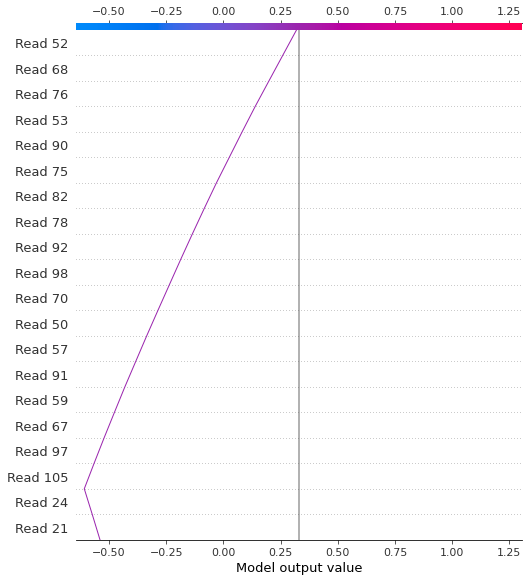

In [26]:
print("Sapienses:")
shap.decision_plot(likeli_calculator.explainer.expected_value[0], shaps[0], feature_names=["Read " + str(i) for i in range(likeli_calculator.number_of_reads)])


Neanderthals:


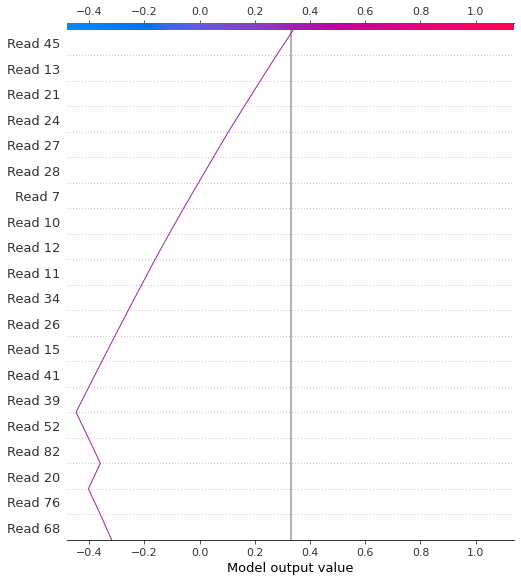

In [27]:
print("Neanderthals:")
shap.decision_plot(likeli_calculator.explainer.expected_value[1], shaps[1], feature_names=["Read " + str(i) for i in range(likeli_calculator.number_of_reads)])

Multi output decision plot:


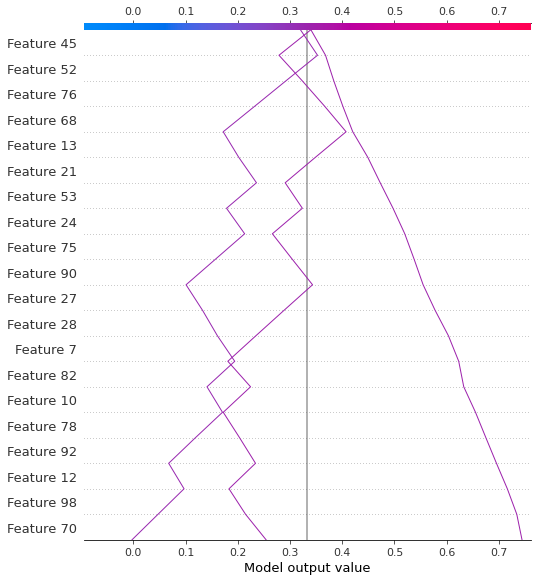

In [29]:
print("Multi output decision plot:")
shap.multioutput_decision_plot(list(likeli_calculator.explainer.expected_value), shaps, row_index=0)

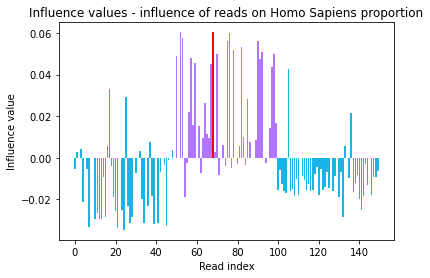

In [30]:
color = [(0.1,0.7,0.9)]*50 + [(0.5,0.1,1,0.6)]*50+[(0.1,0.7,0.9)]*50
color[68] = 'red'
plt.bar([i for i in range(150)],shaps[0][0],color=color)
plt.title("Influence values - influence of reads on Homo Sapiens proportion")
plt.xlabel("Read index")
plt.ylabel("Influence value")
plt.savefig("influence_values_of_homo_sapienses")

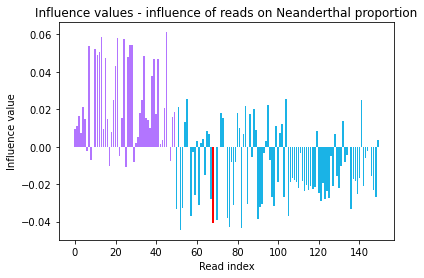

In [31]:
color = [(0.5, 0.1, 1, 0.6)]*50 + [(0.1,0.7,0.9)]*100
color[68] = 'red'
plt.bar([i for i in range(150)],shaps[1][0],  color=color)
plt.title("Influence values - influence of reads on Neanderthal proportion")
plt.xlabel("Read index")
plt.ylabel("Influence value")
plt.savefig("influence_values_of_Neanderthals")

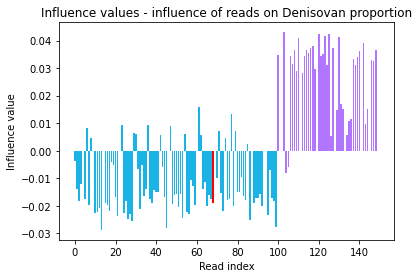

In [32]:
color = [(0.1,0.7,0.9)]*100+[(0.5,0.1,1,0.6)]*50
color[68] = 'red'
plt.bar([i for i in range(150)],shaps[2][0],color=color)
plt.title("Influence values - influence of reads on Denisovan proportion")
plt.xlabel("Read index")
plt.ylabel("Influence value")
plt.savefig("influence_values_of_denisovans")
plt.show()


### Get most influencing reads:

## Estimate the accuracy of the model:
Here we sample groups from the known simulated samples we created, and calculate how accurate the model is on the sample using Chi Squared test.

In [23]:
sample_sizes = [10*i for i in range(100) if i > 0 and 10*i < total_length]
print(sample_sizes)
indexes = [i for i in range(total_length)]
number_of_trials_per_sample_size = 100

data_kl = []
data_kl_guess = []

for sample_size in sample_sizes:
    print("sample size:", sample_size)
    chi_square_p_values_current = []
    number_of_samples = 0
    while (number_of_samples < number_of_trials_per_sample_size):
        sample = random.sample(indexes, sample_size)
        neanderthals_in_sample = len([i for i in sample if i in neanderthal_indexes])/sample_size
        sapiens_in_sample = len([i for i in sample if i in sapienses_indexes])/sample_size
        denisovans_in_sample = len([i for i in sample if i in denisovans_indexes])/sample_size
        if(denisovans_in_sample > 0 and sapiens_in_sample > 0 and neanderthals_in_sample > 0):
            expected_result = np.asarray([sapiens_in_sample, neanderthals_in_sample, denisovans_in_sample])
            result = likeli_calculator.calc_maximum_likelihood_on_subset(sample).values[0]
            kl_divergence_result = sum(rel_entr(result, expected_result))
            data_kl.append((sample_size, kl_divergence_result))
            number_of_samples+=1

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
sample size: 10
sample size: 20
sample size: 30
sample size: 40
sample size: 50
sample size: 60
sample size: 70
sample size: 80
sample size: 90
sample size: 100
sample size: 110
sample size: 120
sample size: 130
sample size: 140


<AxesSubplot:xlabel='Number Of Reads', ylabel='KL_divergence_from_ground_truth'>

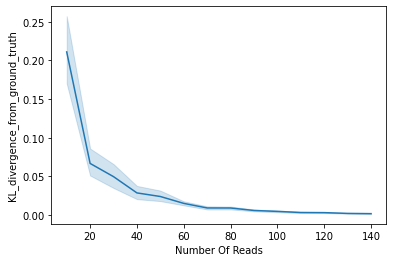

In [25]:
df_kl_divergence = pd.DataFrame(data_kl, columns=["Number Of Reads", "KL_divergence_from_ground_truth"])
sns.lineplot(data=df_kl_divergence, x="Number Of Reads", y="KL_divergence_from_ground_truth")
